In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('../script')

from functions import get_unique_shop_item
from features import create_date_features

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [160]:
nrows = None
train = pd.read_csv('../input/sales_train_v2.csv', nrows=nrows)
test = pd.read_csv('../input/test.csv')

In [161]:
train.head(10)

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
5  10.01.2013               0       25     2564      349.00           1.0
6  02.01.2013               0       25     2565      549.00           1.0
7  04.01.2013               0       25     2572      239.00           1.0
8  11.01.2013               0       25     2572      299.00           1.0
9  03.01.2013               0       25     2573      299.00           3.0

In [162]:
test.head(5)

ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268

In [163]:
train = create_date_features(train)

In [173]:
train.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  day  \
0 2013-01-02               0       59    22154      999.00           1.0    2   
1 2013-01-03               0       25     2552      899.00           1.0    3   
2 2013-01-05               0       25     2552      899.00          -1.0    5   
3 2013-01-06               0       25     2554     1709.05           1.0    6   
4 2013-01-15               0       25     2555     1099.00           1.0   15   

   day_week  month  year  
0         2      1  2013  
1         3      1  2013  
2         5      1  2013  
3         6      1  2013  
4         1      1  2013

In [176]:
train_unique = get_unique_shop_item(train, test)

In [177]:
features = ['shop_id', 'item_id']
print(train_unique[features].drop_duplicates().shape)
print(test[features].drop_duplicates().shape)

(0, 2)
(214200, 2)


In [182]:
test[features].values

array([[    5,  5037],
       [    5,  5320],
       [    5,  5233],
       ..., 
       [   45, 15757],
       [   45, 19648],
       [   45,   969]], dtype=int64)

In [192]:
feat1 = 'shop_id'
feat2 = 'item_id'
train_unique = train[train[feat1].isin(test[feat1].values) | train[feat2].isin(test[feat2].values)]

In [193]:
train_unique[features].drop_duplicates().shape

(359880, 2)

In [189]:
test.shape

(214200, 3)

In [167]:
test.sort_values(by=['shop_id', 'item_id']).head()

ID  shop_id  item_id
22987  22987        2       30
20994  20994        2       31
20995  20995        2       32
22492  22492        2       33
22491  22491        2       38

In [156]:
test.sort_values(by=['shop_id', 'item_id']).head()

ID  shop_id  item_id  item_cnt_month
22987  22987        2       30        0.029412
20994  20994        2       31        0.147059
20995  20995        2       32        0.147059
22492  22492        2       33        0.029412
22491  22491        2       38        0.176471

In [123]:
train[features].isin(test[features].values).prod(axis=1)

0          1
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         1
11         1
12         1
13         1
14         1
15         1
16         1
17         1
18         1
19         1
20         0
21         0
22         0
23         1
24         1
25         0
26         0
27         0
28         0
29         0
          ..
2935819    1
2935820    1
2935821    1
2935822    0
2935823    0
2935824    1
2935825    1
2935826    1
2935827    1
2935828    1
2935829    1
2935830    1
2935831    1
2935832    0
2935833    1
2935834    1
2935835    1
2935836    1
2935837    1
2935838    1
2935839    1
2935840    1
2935841    1
2935842    1
2935843    1
2935844    1
2935845    1
2935846    1
2935847    1
2935848    1
Length: 2935849, dtype: int32

In [120]:
train[train[features].isin(test[features]).prod(axis=1) == 1]

Empty DataFrame
Columns: [date, date_block_num, shop_id, item_id, item_price, item_cnt_day, day, day_week, month, year]
Index: []

In [139]:
max_dates = train_unique.groupby(['item_id'])['date'].max()

In [140]:
max_dates.head()

item_id
16   2014-09-13
18   2014-08-18
19   2013-01-12
26   2014-10-16
28   2014-03-21
Name: date, dtype: datetime64[ns]

In [141]:
max_dates[max_dates.dt.year < 2015].count() / max_dates.count()

0.027021321511505172

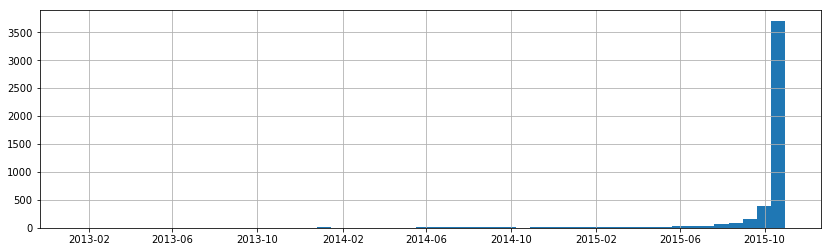

In [142]:
max_dates.hist(bins=50, figsize=(14, 4))

In [143]:
cond = train_unique['year'] < 2015
feat = 'day'
df = train_unique[cond].groupby(['shop_id', feat])['item_cnt_day'].sum().reset_index()

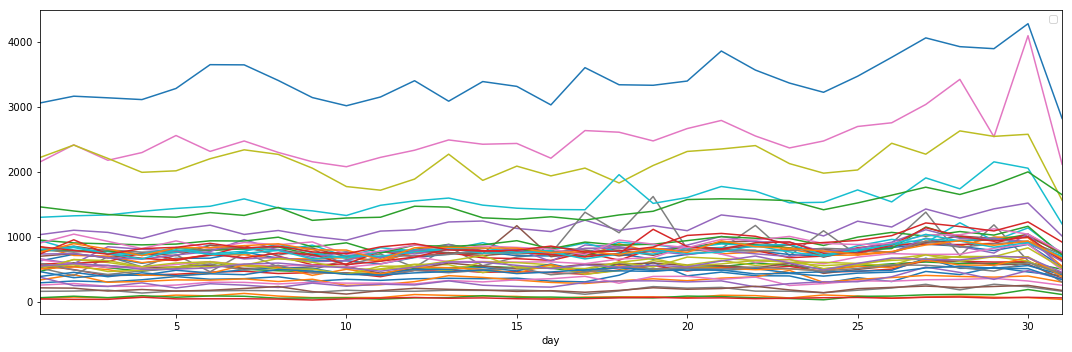

In [144]:
target = 'item_cnt_day'
fig, ax = plt.subplots(figsize=(15, 5))
for shop_id in df['shop_id'].unique():
    df[df['shop_id'] == shop_id].plot(x=feat, y=target, ax=ax)

plt.legend([])
fig.tight_layout()

In [145]:
feat = 'day'
n_month = 34
df = (train_unique.groupby(['shop_id', 'item_id'])['item_cnt_day'].sum() / n_month).reset_index()

In [146]:
features = ['shop_id', 'item_id']
df.head()

shop_id  item_id  item_cnt_day
0        2       30      0.117647
1        2       31      0.235294
2        2       32      0.323529
3        2       33      0.323529
4        2       53      0.029412

In [147]:
len(train_unique.groupby(['shop_id', 'item_id']))

118119

In [148]:
test = test.sort_values(by=['shop_id', 'item_id'])

In [149]:
df['item_cnt_day'].shape

(118119,)

In [150]:
test.shape

(214200, 3)

In [152]:
test['item_cnt_month'] = df['item_cnt_day']

In [154]:
sub = test.sort_values('ID')[['ID', 'item_cnt_month']]

In [25]:
sub.to_csv('../output/sub_mean_all.csv', index=False)

In [33]:
sub.iloc[118121]

ID                118121.0
item_cnt_month         NaN
Name: 118121, dtype: float64

In [32]:
sub[sub['item_cnt_month'] == 0.]

ID  item_cnt_month
1635      1635             0.0
1844      1844             0.0
2567      2567             0.0
5637      5637             0.0
5960      5960             0.0
6800      6800             0.0
11514    11514             0.0
11798    11798             0.0
15046    15046             0.0
18399    18399             0.0
18803    18803             0.0
19279    19279             0.0
19677    19677             0.0
19820    19820             0.0
19823    19823             0.0
21262    21262             0.0
26133    26133             0.0
31759    31759             0.0
38648    38648             0.0
39361    39361             0.0
46834    46834             0.0
48192    48192             0.0
53478    53478             0.0
54904    54904             0.0
60294    60294             0.0
60321    60321             0.0
60751    60751             0.0
61332    61332             0.0
62343    62343             0.0
62552    62552             0.0
...        ...             ...
66566    66566             0.0
67428    67428             0.0
68207    68207             0.0
68300    68300             0.0
70699    70699             0.0
71824    71824             0.0
73121    73121             0.0
79680    79680             0.0
79920    79920             0.0
80198    80198             0.0
81211    81211             0.0
82169    82169             0.0
82182    82182             0.0
83393    83393             0.0
85754    85754             0.0
87640    87640             0.0
87652    87652             0.0
88144    88144             0.0
91234    91234             0.0
91467    91467             0.0
93070    93070             0.0
93639    93639             0.0
101806  101806             0.0
104683  104683             0.0
105677  105677             0.0
105678  105678             0.0
111566  111566             0.0
112203  112203             0.0
113284  113284             0.0
114693  114693             0.0

[65 rows x 2 columns]

In [124]:
test.head()

ID  shop_id  item_id
22987  22987        2       30
20994  20994        2       31
20995  20995        2       32
22492  22492        2       33
22491  22491        2       38

In [121]:
train_unique[train_unique['item_price']]

date  date_block_num  shop_id  item_id    item_price  \
885138  2013-09-17               8       12    11365  59200.000000   
1132918 2013-12-23              11       26     6675  27990.000000   
1132919 2013-12-24              11       26     6675  27990.000000   
1132920 2013-12-25              11       26     6675  27990.000000   
1132921 2013-12-26              11       26     6675  27990.000000   
1132922 2013-12-28              11       26     6675  27990.000000   
1132923 2013-12-29              11       26     6675  24656.666667   
1132924 2013-12-30              11       26     6675  27990.000000   
1132951 2013-12-20              11       26     6675  27990.000000   
1132952 2013-12-18              11       26     6675  24132.857143   
1132976 2013-12-19              11       26     6675  24990.000000   
1133699 2013-12-18              11       24     6675  24990.000000   
1133700 2013-12-19              11       24     6675  24390.000000   
1133701 2013-12-21              11       24     6675  27990.000000   
1133702 2013-12-22              11       24     6675  27990.000000   
1133703 2013-12-23              11       24     6675  27990.000000   
1133714 2013-12-31              11       24     6675  27990.000000   
1133715 2013-12-28              11       24     6675  27990.000000   
1133716 2013-12-27              11       24     6675  27990.000000   
1133717 2013-12-26              11       24     6675  27990.000000   
1139440 2013-12-24              11       25     6675  27990.000000   
1139441 2013-12-23              11       25     6675  27990.000000   
1139442 2013-12-22              11       25     6675  27990.000000   
1139443 2013-12-21              11       25     6675  26190.000000   
1139444 2013-12-20              11       25     6675  24656.666667   
1139445 2013-12-19              11       25     6675  24640.000000   
1139447 2013-12-18              11       25     6675  24066.923077   
1139455 2013-12-25              11       25     6675  27990.000000   
1139491 2013-12-26              11       25     6675  27990.000000   
1139492 2013-12-28              11       25     6675  27990.000000   
...            ...             ...      ...      ...           ...   
2927658 2015-10-18              33       28    13449  28392.000000   
2930299 2015-10-05              33       24     6676  24892.000000   
2930300 2015-10-07              33       24     6676  26392.000000   
2930301 2015-10-10              33       24     6676  26392.000000   
2930302 2015-10-16              33       24     6678  26392.000000   
2930487 2015-10-23              33       24    12124  27991.000000   
2930498 2015-10-09              33       24    12124  29991.000000   
2931061 2015-10-08              33       22    12124  27991.000000   
2931062 2015-10-29              33       22    12125  26990.000000   
2931380 2015-10-20              33       22    13403  42990.000000   
2931441 2015-10-09              33       21    12124  27991.000000   
2931442 2015-10-03              33       21    12125  24391.000000   
2931443 2015-10-12              33       21    12125  23991.000000   
2931828 2015-10-25              33       21    13503  34990.000000   
2931834 2015-10-19              33       21    13448  34990.000000   
2932210 2015-10-03              33       21     6674  32990.000000   
2932211 2015-10-11              33       21     6676  30990.000000   
2932212 2015-10-26              33       21     6678  26392.000000   
2932593 2015-10-08              33       25    13499  31990.000000   
2932598 2015-10-16              33       25    13448  34990.000000   
2932599 2015-10-24              33       25    13448  34990.000000   
2932600 2015-10-26              33       25    13449  32990.000000   
2932637 2015-10-26              33       25    13403  37991.000000   
2933021 2015-10-24              33       25    12124  27991.000000   
2933022 2015-10-01              33       25    12125  24391.000000   
2933023 2015-10-23      

C:\Users\naz-probook\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\naz-probook\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-f94d3caeb070>", line 1, in <module>
    train.groupby('shop_id').hist()
  File "C:\Users\naz-probook\Anaconda3\lib\site-packages\pandas\core\groupby.py", line 595, in wrapper
    return self.apply(curried)
  File "C:\Users\naz-probook\Anaconda3\lib\site-packages\pandas\core\groupby.py", line 716, in apply
    return self._python_apply_general(f)
  File "C:\Users\naz-probook\Anaconda3\lib\site-packages\pandas\core\groupby.py", line 720, in _python_apply_general
    self.axis)
  File "C:\Users\naz-probook\Anaconda3\lib\site-packages\pandas\core\groupby.py", line 1802, in apply
    res = f(group)
  File "C:\Users\naz-probook\Anaconda3\lib\site-packages\pandas\core\groupby.py", line 586, in curried
    return f(x, *args, **kwargs)
  File "C:\Users\naz-probook\Anac

KeyboardInterrupt: 

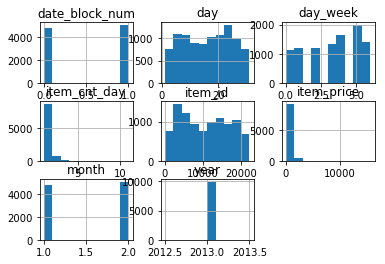

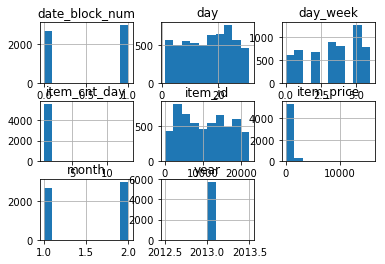

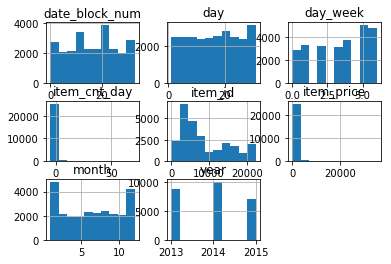

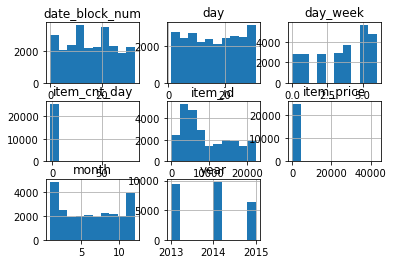

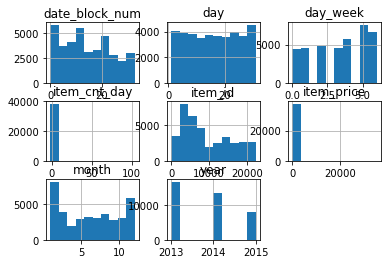

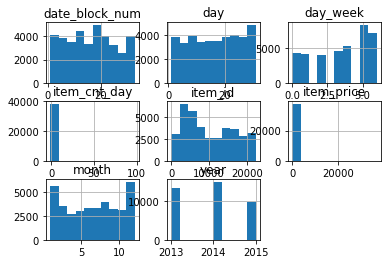

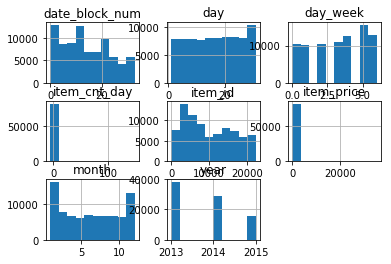

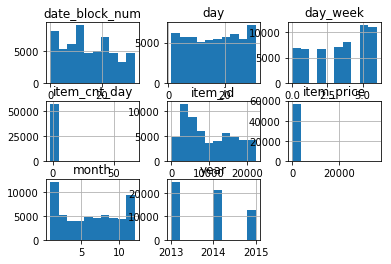

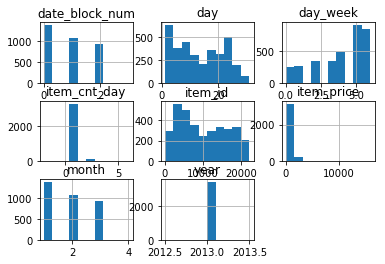

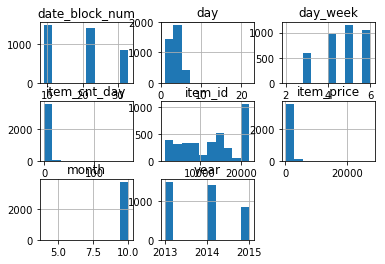

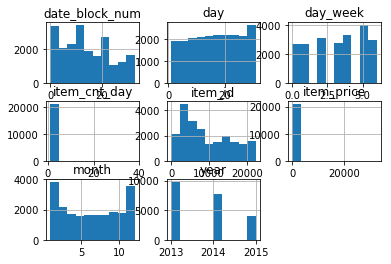

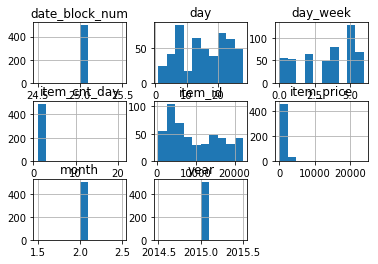

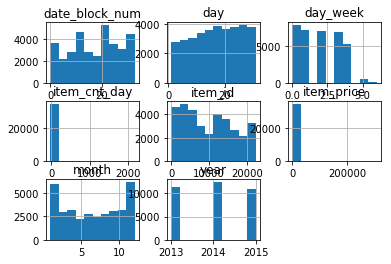

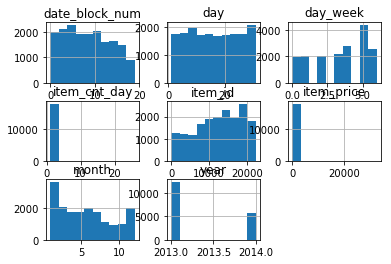

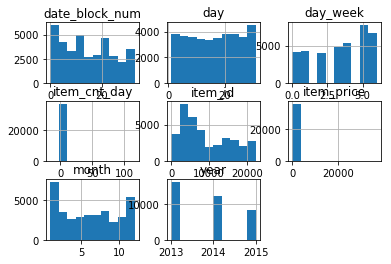

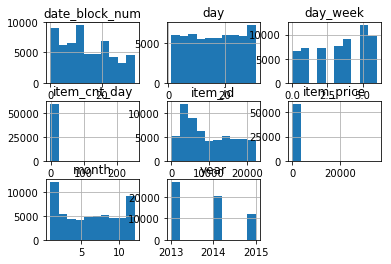

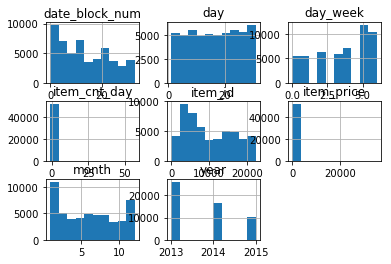

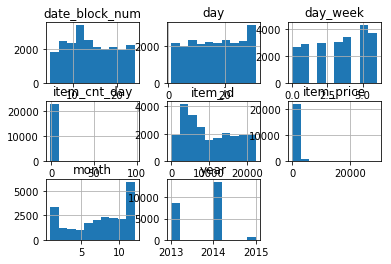

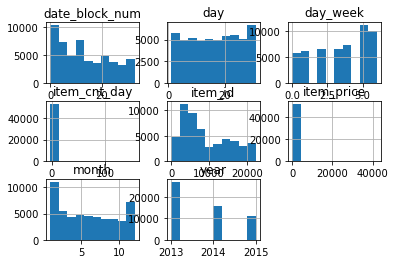

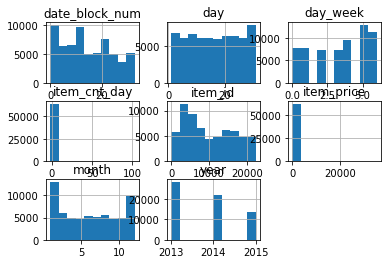

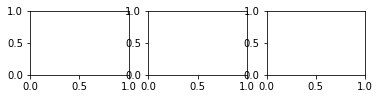

In [10]:
train.groupby('shop_id').hist(bins=100)

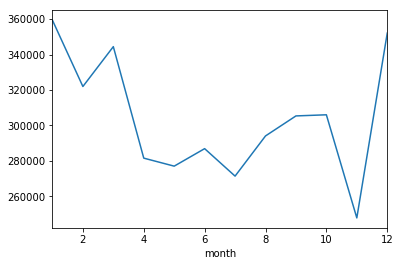

In [150]:
train.groupby('month')['item_cnt_day'].apply(np.sum).plot()

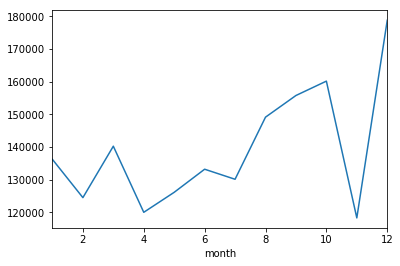

In [149]:
train_unique.groupby('month')['item_cnt_day'].apply(np.sum).plot()

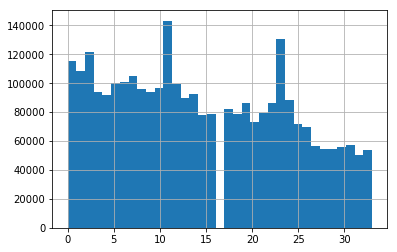

In [13]:
train['date_block_num'].hist(bins=35)

In [16]:
features = train.columns
features

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'day', 'day_week', 'month', 'year'],
      dtype='object')

In [33]:
df = train.groupby(['shop_id', 'item_id', 'month'])['item_cnt_day'].apply(np.sum)

In [34]:
df.head()

shop_id  item_id  month
0        30       2        31.0
         31       2        11.0
         32       1         6.0
                  2        10.0
         33       1         3.0
Name: item_cnt_day, dtype: float64

In [40]:
df = df.reset_index()

In [ ]:
df.plot(x='month')

KeyboardInterrupt: 